(150, 4)
(150,)
(array([39, 57, 77, 79]),)
(array([19, 21, 70, 75, 85]),)
(array([  3,  15,  18,  36,  46,  63,  72,  74,  83,  84, 104]),)
(array([ 2,  5, 28, 32, 44, 60, 62, 67, 68, 81, 82, 88, 95]),)
(array([ 4, 37, 43]),)
(array([ 6, 34, 35, 58, 80, 94]),)
(array([ 1, 14, 16, 25, 54, 55, 65, 78, 90, 99]),)
(array([42, 45, 56, 69, 71, 86, 93]),)
(array([11, 12, 22, 27, 29, 40, 48, 52, 87, 91, 96, 97]),)
(array([ 10,  17,  30,  33,  41,  51,  64,  76, 100, 101, 102]),)
(array([20, 23, 31, 73]),)
(array([ 24,  26,  38,  50,  61,  66,  89, 103]),)
(array([ 8, 59, 92]),)
(array([53, 98]),)
(array([ 9, 47]),)
(array([ 0,  7, 13, 49]),)
accuracy_score: 0.5777777777777777


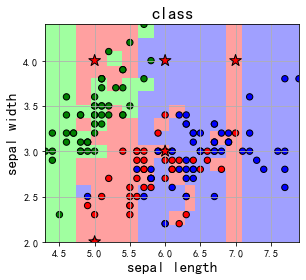

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import pydotplus

import pdb
from sklearn.datasets import load_iris

import math


class DecisionTreeClassifier(object):
    def __init__(self, criterion):
        self.criterion = criterion
        self.order = []
        self.degree = 16
        self.de1 = np.zeros([self.degree, x_train.shape[1]])
        self.rate = np.zeros([self.degree, x_train.shape[1]])
        self.feature = []
        self.classes_num = np.zeros([self.degree, self.degree])
        self.max = np.zeros(x_train.shape[1])
        self.min = np.zeros(x_train.shape[1])

    def info(self, y_train):
        Ent_D = 0
        if len(y_train) == 0:
            return 0
        for i in range(3):
            '''
            补充代码，根据公示计算信息熵
            '''
            p = np.sum([y_train[:] == i])/len(y_train)
            if p == 0:
                continue
            else:
                Ent_D -= p * math.log(p, 2)
        return Ent_D

    def best_feature(self, x_train, y_train):
        '''
        补充代码，调用上述函数计算信息熵
        '''
        Ent_D = self.info(y_train)
        gain = []
        for k in range(x_train.shape[1]):
            gain_var = 0
            for i in range(self.degree):
                self.rate[i, k] = np.sum(x_train[:, k] == i)
                ent = self.info(y_train[x_train[:, k] == i])
                gain_var = gain_var + self.rate[i, k] / y_train.shape[0] * ent
            '''
            补充代码，计算信息熵增益，并添加到列表gain中
            '''
            gain.append(Ent_D - gain_var)
        '''
        补充代码，对信息熵增益进行排序
        '''
        gain_sort = list(gain)
        gain_sort.sort(reverse = False)
        for k in range(x_train.shape[1]):
            self.feature.append(np.where(gain == gain_sort[x_train.shape[1] - 1 - k])[0][0])
        return 0

    def normal(self, x_train, flag=0):
        for k in range(x_train.shape[1]):
            if (flag == 0):
                x1_max = max(x_train[:, k]);
                x1_min = min(x_train[:, k]);
                for j in range(self.degree):
                    self.de1[j, k] = x1_min + (x1_max - x1_min) / self.degree * j
            else:
                x1_max = self.max[k]
                x1_min = self.min[k]
            var = x_train[:, k].copy()

            for j in range(self.degree):
                var[x_train[:, k] >= self.de1[j, k]] = j
            x_train[:, k] = var
            if (flag == 0):
                self.min[k] = x1_min
                self.max[k] = x1_max
        return x_train

    def argmax(self, y_train):
        maxnum = 0
        for i in range(4):
            a = np.where(y_train == i)
            if (a[0].shape[0] > maxnum):
                maxnum = i
        return maxnum

    def fit(self, x_train, y_train):
        x_train = self.normal(x_train, flag=0)
        self.best_feature(x_train, y_train)
        for i in range(self.degree):
            a = np.where(x_train[:, self.feature[0]] == i)
            print(a)
            for j in range(self.degree):
                var2 = []
                var2_y = []
                if (a != []):
                    b = []
                    for k in a[0]:
                        if (x_train[k, self.feature[1]] == j):
                            b.append(k)
                    # print("new")
                    # print(b)

                    if (b != []):
                        self.classes_num[i, j] = self.argmax(y_train[b])
                    else:
                        self.classes_num[i, j] = self.argmax(y_train[a[0]])
                else:
                    self.classes_num[i, j] = self.argmax(y_train)
        return (0)

    def predict(self, x_test):
        y_show_hat = np.zeros([x_test.shape[0]])
        x_test = self.normal(x_test, 1)
        for j in range(x_test.shape[0]):
            var = int(x_test[j, self.feature[0]])
            var2 = int(x_test[j, self.feature[1]])
            y_show_hat[j] = self.classes_num[var, var2]
        return y_show_hat


iris_feature_E = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_feature = ['elength', 'ewidth', 'blength', 'bwidth']
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

if __name__ == "__main__":
    mpl.rcParams['font.sans-serif'] = [u'simHei']
    mpl.rcParams['axes.unicode_minus'] = False
    data = load_iris()
    x = data.data
    print(x.shape)
    y = data.target
    print(y.shape)
    x = x[:, :2]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=1)
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(x_train, y_train)

    y_test_hat = model.predict(x_test)
    '''
    补充代码，调用以上编写的决策树类；
    对训练集进行训练；
    输出测试集结果；
    计算准确度。
    '''
    score = accuracy_score(y_test, y_test_hat)
    print('accuracy_score:', score)

    N, M = 50, 50
    x1_min, x2_min = [min(x[:, 0]), min(x[:, 1])]
    x1_max, x2_max = [max(x[:, 0]), max(x[:, 1])]

    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)
    x_show = np.stack((x1.flat, x2.flat), axis=1)
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_show_hat = model.predict(x_show)
    y_show_hat = y_show_hat.reshape(x1.shape)
    plt.figure(1, figsize=(10, 4), facecolor='w')
    plt.subplot(1, 2, 1)
    plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark,marker='*')
    plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)
    plt.xlabel('sepal length', fontsize=15)
    plt.ylabel('sepal width', fontsize=15)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(True)
    plt.title('class', fontsize=17)
    plt.show()


Depth:  1  | Accuracy: 0.5555555555555556
Depth:  2  | Accuracy: 0.7555555555555555
Depth:  3  | Accuracy: 0.7555555555555555
Depth:  4  | Accuracy: 0.7555555555555555
Depth:  5  | Accuracy: 0.7555555555555555
Depth:  6  | Accuracy: 0.6666666666666666
Depth:  7  | Accuracy: 0.6444444444444445
Depth:  8  | Accuracy: 0.6666666666666666
Depth:  9  | Accuracy: 0.6
Depth:  10  | Accuracy: 0.6444444444444445
Depth:  11  | Accuracy: 0.6222222222222222
Depth:  12  | Accuracy: 0.6222222222222222
Depth:  13  | Accuracy: 0.6222222222222222
Depth:  14  | Accuracy: 0.6222222222222222
Depth:  15  | Accuracy: 0.6222222222222222
Depth:  1  | Accuracy: 0.6
Depth:  2  | Accuracy: 0.9555555555555556
Depth:  3  | Accuracy: 0.9555555555555556
Depth:  4  | Accuracy: 0.9555555555555556
Depth:  5  | Accuracy: 0.9555555555555556
Depth:  6  | Accuracy: 0.9555555555555556
Depth:  7  | Accuracy: 0.9555555555555556
Depth:  8  | Accuracy: 0.9555555555555556
Depth:  9  | Accuracy: 0.9555555555555556
Depth:  10  | Ac

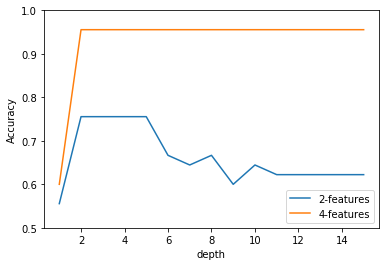

In [16]:
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from numpy import *
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV


data = datasets.load_iris()
x = data.data
y = data.target
x_2 = x[:, :2] # only 2 features
x_4 = x[:, :4] # 4 features

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_2, y, train_size=0.7, test_size=0.3, random_state=1)
'''
补充代码，参考上句将x_4分为训练集和测试集
'''
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_4, y, train_size=0.7, test_size=0.3, random_state=1)


Accuracy2 = []
Accuracy4 = []

for i in range(15):
    depth = i+1
    '''
    补充代码，调用sklearn决策树类，传入参数depth；
    对x_2训练集进行训练；
    输出测试集结果；
    计算准确度。
    '''
    model = DecisionTreeClassifier(random_state = 0, max_depth = depth)
    model.fit(x_train2, y_train2)
    y_test2_hat = model.predict(x_test2)
    score2 = accuracy_score(y_test2, y_test2_hat)
    print("Depth: " , depth," | Accuracy:",score2)
    Accuracy2.append(score2)
for i in range(15):
    depth = i+1
    '''
    补充代码，调用sklearn决策树类，传入参数depth；
    对x_4训练集进行训练；
    输出测试集结果；
    计算准确度。
    '''
    model = DecisionTreeClassifier(random_state = 0, max_depth = depth)
    model.fit(x_train4, y_train4)
    y_test4_hat = model.predict(x_test4)
    score4 = accuracy_score(y_test4, y_test4_hat)
    print("Depth: " , depth," | Accuracy:",score4)
    Accuracy4.append(score4)

t = list(range(1,16))
plt.figure()
plt.plot(t,Accuracy2)
plt.plot(t,Accuracy4)
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.legend(['2-features','4-features'])
plt.show()

In [33]:
tree_param_grid = { 'max_depth': list((2,4,6,8,10,12)), 'min_samples_split': list((2,3,6,8,9))
                   ,'max_features':list(('sqrt','log2','auto'))}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=tree_param_grid, cv=5)
grid.fit(x_train4, y_train4)
print(grid.best_params_, grid.best_score_)


{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 6} 0.9809523809523809
